# Monte Carlo control using e-greedy policy for infinite horizon

## First Visit


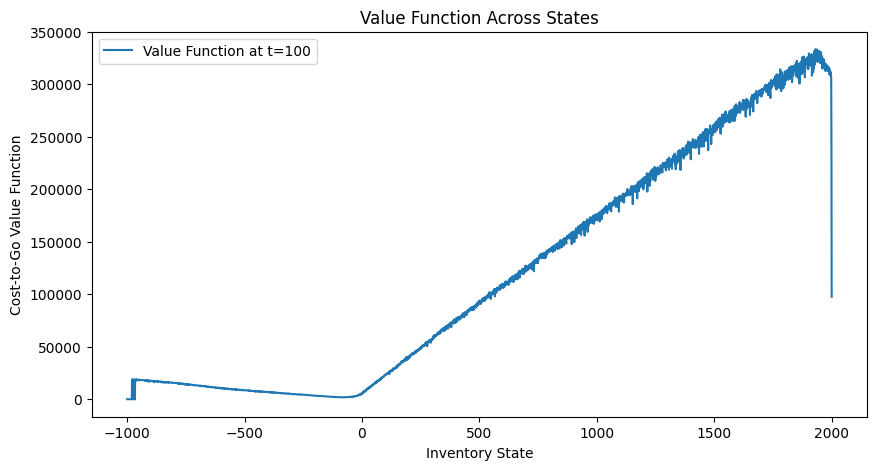

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
max_action = 20
horizon = 100
discount = 0.9
epsilon = 0.4
price = 5
max_demand = 10
a = 1
b = 2

max_inventory = max_action * horizon
min_inventory = -max_demand * horizon

num_states = max_inventory - min_inventory + 1
num_episodes = 75000

# Initialize Q-values, Returns, and Policy
Q = {state: {action: 0.0 for action in range(max_action)} for state in range(num_states)}
Returns = {state: {action: [] for action in range(max_action)} for state in range(num_states)}
policy = {state: {action: 1 / max_action for action in range(max_action)} for state in range(num_states)}

def state_index(inventory):
    return inventory - min_inventory

# Monte Carlo Control Algorithm
for _ in range(num_episodes):
    episode = []
    state = np.random.randint(min_inventory, max_inventory)  # Random initial inventory
    state_idx = state_index(state)
    
    for t in range(horizon):
        action = random.choices(range(max_action), weights=[policy[state_idx][a] for a in range(max_action)])[0]
        demand = np.random.randint(0, max_demand)
        
        next_state = state + action - demand  # Inventory update
        next_state = max(min(next_state, max_inventory), min_inventory)  # Bound inventory
        next_state_idx = state_index(next_state)
        
        procurement_cost = price * action
        holding_cost = a * max(0, next_state) - b * min(0, next_state)
        reward = (holding_cost + procurement_cost)
        
        state = next_state
        state_idx = next_state_idx
        
        episode.append((state_idx, action, reward))
    
    G = 0
    visited = set()
    for t in range(len(episode) - 1, -1, -1):
        state_idx, action, reward = episode[t]
        G = discount * G + reward
        if (state_idx, action) not in visited:
            visited.add((state_idx, action))
            Returns[state_idx][action].append(G)
            Q[state_idx][action] = np.mean(Returns[state_idx][action])
            
            best_action = min(Q[state_idx], key=Q[state_idx].get)  # Minimize cost
            for a in Q[state_idx]:
                if a == best_action:
                    policy[state_idx][a] = 1 - epsilon + (epsilon / max_action)
                else:
                    policy[state_idx][a] = epsilon / max_action

# Plot Value Function at a Particular Time Step
def plot_value_function(Q, timestep):
    values = [min(Q[state].values()) for state in range(num_states)]  # Use min for cost minimization
    plt.figure(figsize=(10, 5))
    plt.plot(range(min_inventory, max_inventory + 1), values, label=f"Value Function at t={timestep}")
    plt.xlabel("Inventory State")
    plt.ylabel("Cost-to-Go Value Function")
    plt.legend()
    plt.title("Value Function Across States")
    plt.show()

# Example usage (plot at final timestep)
plot_value_function(Q, horizon)

# Starting every day with zero inventory

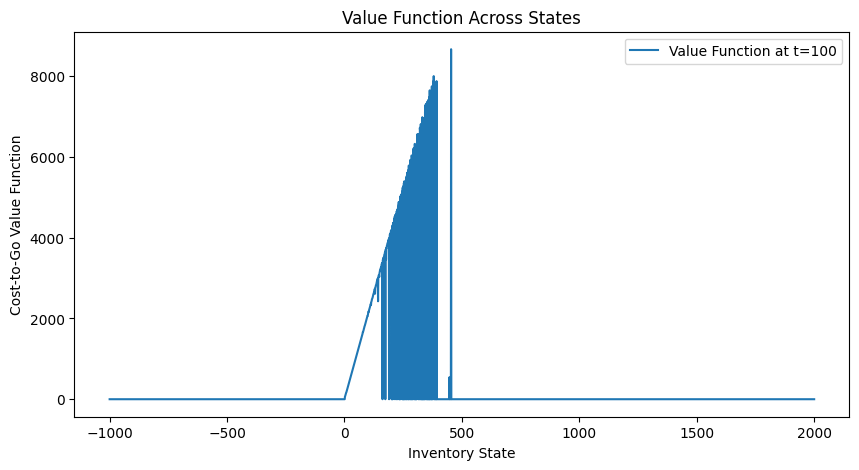

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
max_action = 20
horizon = 100
discount = 0.1
epsilon = 0.4
price = 5
max_demand = 10
a = 1
b = 2

max_inventory = max_action * horizon
min_inventory = -max_demand * horizon

num_states = max_inventory - min_inventory + 1
num_episodes = 5000

# Initialize Q-values, Returns, and Policy
Q = {state: {action: 0.0 for action in range(max_action)} for state in range(num_states)}
Returns = {state: {action: [] for action in range(max_action)} for state in range(num_states)}
policy = {state: {action: 1 / max_action for action in range(max_action)} for state in range(num_states)}

def state_index(inventory):
    return inventory - min_inventory

# Monte Carlo Control Algorithm
for _ in range(num_episodes):
    episode = []
    state = 0  # zero initial inventory
    state_idx = state_index(state)
    
    for t in range(horizon):
        action = random.choices(range(max_action), weights=[policy[state_idx][a] for a in range(max_action)])[0]
        demand = np.random.randint(0, max_demand)
        
        next_state = state + action - demand  # Inventory update
        next_state = max(min(next_state, max_inventory), min_inventory)  # Bound inventory
        next_state_idx = state_index(next_state)
        
        procurement_cost = price * action
        holding_cost = a * max(0, next_state) - b * min(0, next_state)
        reward = (holding_cost + procurement_cost)
        
        state = next_state
        state_idx = next_state_idx
        
        episode.append((state_idx, action, reward))
    
    G = 0
    visited = set()
    for t in range(len(episode) - 1, -1, -1):
        state_idx, action, reward = episode[t]
        G = discount * G + reward
        if (state_idx, action) not in visited:
            visited.add((state_idx, action))
            Returns[state_idx][action].append(G)
            Q[state_idx][action] = np.mean(Returns[state_idx][action])
            
            best_action = min(Q[state_idx], key=Q[state_idx].get)  # Minimize cost
            for a in Q[state_idx]:
                if a == best_action:
                    policy[state_idx][a] = 1 - epsilon + (epsilon / max_action)
                else:
                    policy[state_idx][a] = epsilon / max_action

# Plot Value Function at a Particular Time Step
def plot_value_function(Q, timestep):
    values = [min(Q[state].values()) for state in range(num_states)]  # Use min for cost minimization
    plt.figure(figsize=(10, 5))
    plt.plot(range(min_inventory, max_inventory + 1), values, label=f"Value Function at t={timestep}")
    plt.xlabel("Inventory State")
    plt.ylabel("Cost-to-Go Value Function")
    plt.legend()
    plt.title("Value Function Across States")
    plt.show()

# Example usage (plot at final timestep)
plot_value_function(Q, horizon)

# Increasing the horizon length

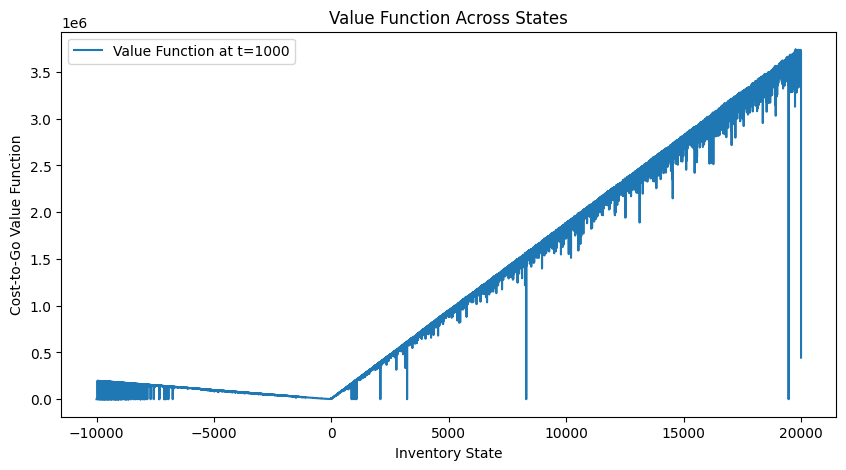

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
max_action = 20
horizon = 1000
discount = 0.9
epsilon = 0.1
price = 5
max_demand = 10
a = 1
b = 2

max_inventory = max_action * horizon
min_inventory = -max_demand * horizon

num_states = max_inventory - min_inventory + 1
num_episodes = 50000

# Initialize Q-values, Returns, and Policy
Q = {state: {action: 0.0 for action in range(max_action)} for state in range(num_states)}
Returns = {state: {action: [] for action in range(max_action)} for state in range(num_states)}
policy = {state: {action: 1 / max_action for action in range(max_action)} for state in range(num_states)}

def state_index(inventory):
    return inventory - min_inventory

# Monte Carlo Control Algorithm
for _ in range(num_episodes):
    episode = []
    state = np.random.randint(min_inventory, max_inventory)  # Random initial inventory
    state_idx = state_index(state)
    
    for t in range(horizon):
        action = random.choices(range(max_action), weights=[policy[state_idx][a] for a in range(max_action)])[0]
        demand = np.random.randint(0, max_demand)
        
        next_state = state + action - demand  # Inventory update
        next_state = max(min(next_state, max_inventory), min_inventory)  # Bound inventory
        next_state_idx = state_index(next_state)
        
        procurement_cost = price * action
        holding_cost = a * max(0, next_state) - b * min(0, next_state)
        reward = (holding_cost + procurement_cost)
        
        state = next_state
        state_idx = next_state_idx
        
        episode.append((state_idx, action, reward))
    
    G = 0
    visited = set()
    for t in range(len(episode) - 1, -1, -1):
        state_idx, action, reward = episode[t]
        G = discount * G + reward
        if (state_idx, action) not in visited:
            visited.add((state_idx, action))
            Returns[state_idx][action].append(G)
            Q[state_idx][action] = np.mean(Returns[state_idx][action])
            
            best_action = min(Q[state_idx], key=Q[state_idx].get)  # Minimize cost
            for a in Q[state_idx]:
                if a == best_action:
                    policy[state_idx][a] = 1 - epsilon + (epsilon / max_action)
                else:
                    policy[state_idx][a] = epsilon / max_action

# Plot Value Function at a Particular Time Step
def plot_value_function(Q, timestep):
    values = [min(Q[state].values()) for state in range(num_states)]  # Use min for cost minimization
    plt.figure(figsize=(10, 5))
    plt.plot(range(min_inventory, max_inventory + 1), values, label=f"Value Function at t={timestep}")
    plt.xlabel("Inventory State")
    plt.ylabel("Cost-to-Go Value Function")
    plt.legend()
    plt.title("Value Function Across States")
    plt.show()

# Example usage (plot at final timestep)
plot_value_function(Q, horizon)

## Every Visit for 100 Horizon length

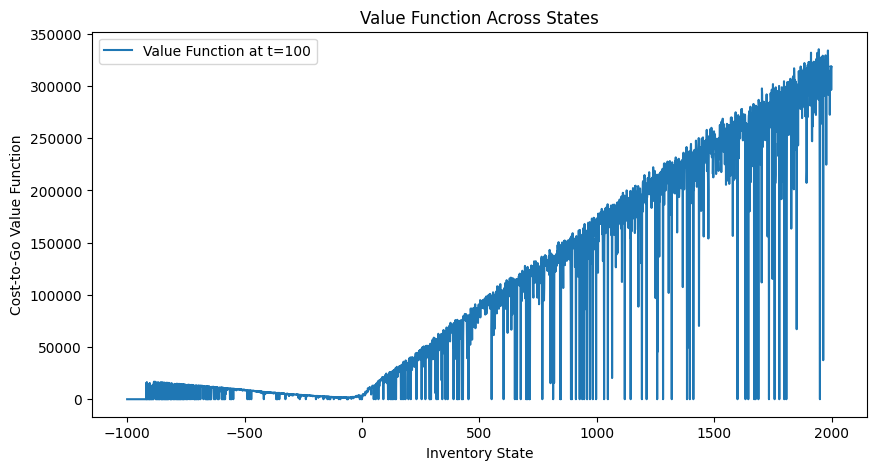

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
max_action = 20
horizon = 100
discount = 0.9
epsilon = 0.1
price = 5
max_demand = 10
a = 1
b = 2

max_inventory = max_action * horizon
min_inventory = -max_demand * horizon

num_states = max_inventory - min_inventory + 1
num_episodes = 50000

# Initialize Q-values, Returns, and Policy
Q = {state: {action: 0.0 for action in range(max_action)} for state in range(num_states)}
Returns = {state: {action: [] for action in range(max_action)} for state in range(num_states)}
policy = {state: {action: 1 / max_action for action in range(max_action)} for state in range(num_states)}

def state_index(inventory):
    return inventory - min_inventory

# Monte Carlo Control Algorithm
for _ in range(num_episodes):
    episode = []
    state = np.random.randint(min_inventory, max_inventory)  # Random initial inventory
    state_idx = state_index(state)
    
    for t in range(horizon):
        action = random.choices(range(max_action), weights=[policy[state_idx][a] for a in range(max_action)])[0]
        demand = np.random.randint(0, max_demand)
        
        next_state = state + action - demand  # Inventory update
        next_state = max(min(next_state, max_inventory), min_inventory)  # Bound inventory
        next_state_idx = state_index(next_state)
        
        procurement_cost = price * action
        holding_cost = a * max(0, next_state) - b * min(0, next_state)
        reward = (holding_cost + procurement_cost)
        
        state = next_state
        state_idx = next_state_idx
        
        episode.append((state_idx, action, reward))
    
    G = 0

    for t in range(len(episode) - 1, -1, -1):
        state_idx, action, reward = episode[t]
        G = discount * G + reward
        Returns[state_idx][action].append(G)
        Q[state_idx][action] = np.mean(Returns[state_idx][action])
        
        best_action = min(Q[state_idx], key=Q[state_idx].get)  # Minimize cost
        for a in Q[state_idx]:
            if a == best_action:
                policy[state_idx][a] = 1 - epsilon + (epsilon / max_action)
            else:
                policy[state_idx][a] = epsilon / max_action



# Plot Value Function at a Particular Time Step
def plot_value_function(Q, timestep):
    values = [min(Q[state].values()) for state in range(num_states)]  # Use min for cost minimization
    plt.figure(figsize=(10, 5))
    plt.plot(range(min_inventory, max_inventory + 1), values, label=f"Value Function at t={timestep}")
    plt.xlabel("Inventory State")
    plt.ylabel("Cost-to-Go Value Function")
    plt.legend()
    plt.title("Value Function Across States")
    plt.show()

# Example usage (plot at final timestep)
plot_value_function(Q, horizon)

In [18]:
values = [min(Q[state].values()) for state in range(num_states)]  # Use min for cost minimization
print(min(values))

0.0


In [11]:

# Print policy
for state in range(num_states):
    inventory = state + min_inventory
    print(inventory, max(policy[state], key=policy[state].get))


-1000 15
-999 19
-998 2
-997 6
-996 3
-995 19
-994 16
-993 10
-992 14
-991 16
-990 17
-989 13
-988 17
-987 0
-986 4
-985 1
-984 17
-983 16
-982 11
-981 10
-980 14
-979 6
-978 15
-977 8
-976 8
-975 4
-974 18
-973 5
-972 11
-971 1
-970 4
-969 14
-968 6
-967 18
-966 10
-965 16
-964 19
-963 0
-962 3
-961 17
-960 0
-959 17
-958 19
-957 19
-956 9
-955 17
-954 10
-953 17
-952 19
-951 7
-950 5
-949 15
-948 13
-947 1
-946 0
-945 2
-944 11
-943 3
-942 6
-941 18
-940 15
-939 14
-938 4
-937 16
-936 7
-935 17
-934 13
-933 17
-932 3
-931 5
-930 0
-929 11
-928 11
-927 8
-926 15
-925 12
-924 14
-923 16
-922 10
-921 18
-920 14
-919 11
-918 7
-917 5
-916 0
-915 13
-914 17
-913 3
-912 6
-911 19
-910 10
-909 17
-908 10
-907 17
-906 11
-905 7
-904 1
-903 4
-902 11
-901 14
-900 8
-899 13
-898 9
-897 13
-896 16
-895 3
-894 5
-893 12
-892 16
-891 19
-890 16
-889 11
-888 0
-887 18
-886 15
-885 14
-884 1
-883 2
-882 13
-881 10
-880 13
-879 8
-878 17
-877 17
-876 17
-875 11
-874 2
-873 17
-872 8
-871 14
-870 16


C:\Users\aryma\AppData\Local\Temp\ipykernel_9588\2981073779.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


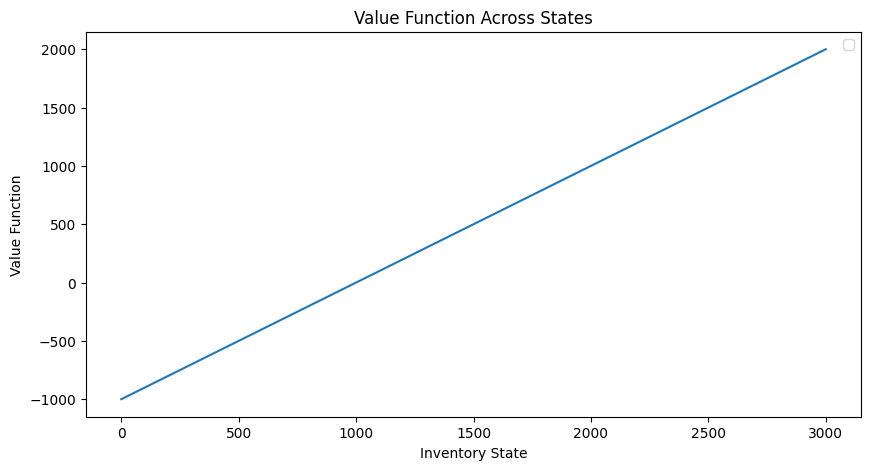

In [13]:
import matplotlib.pyplot as plt

values = [min(Q[state].values()) for state in range(num_states)]

plt.figure(figsize=(10, 5))
plt.plot(range(min_inventory, max_inventory + 1))
plt.xlabel("Inventory State")
plt.ylabel("Value Function")
plt.legend()
plt.title("Value Function Across States")
plt.show()


## Every Visit

In [ ]:
import numpy as np
import random

# Parameters
max_action = 20
horizon = 100
discount = 0.9
epsilon = 0.1
price = 5
max_demand = 10
a = 1
b = 2

max_inventory = max_action * horizon
min_inventory = -max_demand * horizon

num_states = max_inventory - min_inventory + 1
num_episodes = 1000

# Initialize Q-values, Returns, and Policy
Q = {state: {action: 0.0 for action in range(max_action)} for state in range(num_states)}
Returns = {state: {action: [] for action in range(max_action)} for state in range(num_states)}
policy = {state: {action: 1 / max_action for action in range(max_action)} for state in range(num_states)}

def state_index(inventory):
    return inventory - min_inventory

# Monte Carlo Control Algorithm
for _ in range(num_episodes):
    episode = []
    state = np.random.randint(min_inventory, max_inventory)  # Random initial inventory
    state = state_index(state)
    
    for t in range(horizon):
        action = random.choices(range(max_action), weights=[policy[state][a] for a in range(max_action)])[0]
        demand = np.random.randint(0, max_demand)
        reward = price * min(action, demand) - a * action + b * (demand - min(action, demand))
        next_state = state + demand - action  # Inventory update
        next_state = max(min(next_state, max_inventory), min_inventory)  # Bound inventory
        next_state = state_index(next_state)
        episode.append((state, action, reward))
        state = next_state
    
    G = 0
    for t in range(len(episode) - 1, -1, -1):
        state, action, reward = episode[t]
        G = discount * G + reward
        visited.add((state, action))
        Returns[state][action].append(G)
        Q[state][action] = np.mean(Returns[state][action])
        
        best_action = max(Q[state], key=Q[state].get)
        for a in Q[state]:
            if a == best_action:
                policy[state][a] = 1 - epsilon + (epsilon / max_action)
            else:
                policy[state][a] = epsilon / max_action
